# Ejercicio 4 - Modelos de Agrupamiento

<hr width="50%" align="left"/>
<br/>

## **Grupo 09**

## Integrantes:

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martin Andres Maddalena](https://github.com/mmaddalena) (107610)
<br/>
</p>

<p>
<img align="left" src="https://github.com/Petroshka00.png" height=50 width=50 />

### [Tomas Petrocini](https://github.com/Petroshka00) (110157)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mateozorzi.png" height=50 width=50 />

### [Mateo Zorzi](https://github.com/mateozorzi) (109634)
<br/>
</p>

<p>
<img align="left" src="https://github.com/AlanRichmond" height=50 width=50 />

### [Alan Richmond](https://github.com/AlanRichmond) (106783)
<br/>
</p>

<p>
<img align="left" src="https://github.com/gbigolin.png" height=50 width=50 />

### [Gianella Bigolin](https://github.com/gbigolin) (108659)
<br/>
</p>

<hr width="50%" align="left"/>
<br/>

# Imports generales


In [ ]:
# Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Para trabajar con formato parquet
import pyarrow.parquet as pq

# Para chequear que los datasets ya estan importados
import os


!pip install gdown --quiet
import gdown

from joblib import dump
from joblib import load

# Importar dataset

In [ ]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("spotify.csv"):
    !wget -O spotify.csv https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej4/spotify.csv

dataset = pd.read_csv("spotify.csv")

--2025-10-13 20:39:41--  https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej4/spotify.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54374 (53K) [text/plain]
Saving to: ‘spotify.csv’

spotify.csv         100%[===================>]  53.10K  --.-KB/s    in 0.01s   

2025-10-13 20:39:42 (5.38 MB/s) - ‘spotify.csv’ saved [54374/54374]



# Exploracion de los datos

Realizamos una exploracion inicial de las variables presentes:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB


| Tipo de Variable |  Símbolo  |
|:----------------:|:---------:|
|Cualitativa|   ★  |
|Cuantitativa Discreta|    ♣   |
|Cuantitativa Continua|    ♠   |

<br/><hr width="25%" align="left" /><br/>

* **★ mode:** indica la modalidad de una pista:
  * `1`: modalidad mayor
  * `0`: modalidad menor
* **★ key:** indica la tonalidad de la pista (rango: `-1` - `11`)
* **♠ acousticness:** indica que tan acústica es una pista. (rango: `0` - `1`)
* **♠ danceability:** indica que tan idonea es una canción para ser bailada. (rango: `0` - `1`)
* **♠ duration:** indica la duración de la pista en milisegundos
* **♠ energy:** representa una medida perceptiva de intensidad y actividad de una pista. (rango: `0` - `1`)
* **♠ instrumentalness:** precide si una pista no contiene voces (rango: `0` - `1`)
* **♠ liveness:** precide la presencia de una audiencia durante la grabación de una pista. (rango: `0` - `1`)
* **♠ loudness:** indica la sonoridad general de una pista en decibelios (dB). (rango: `-60` - `0`)
* **♠ speechiness:** predice la presencia de contenido hablado en la pista. (rango: `0` - `1`)
* **♠ tempo:** indica el tiempo general estimado de una pista en beats por minuto (BPM).
* **♣ time_signature:** indica una estimación de compas. (rango: `3` - `7`)
* **♠ valence:** indica la positividad musical que transmite una pista. (rango: `0` - `1`)

In [ ]:
print(dataset.isna().sum())

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


El dataset no cuenta con valores faltantes en ninguna de sus columnas.

## Variables cuantitativas

Con el metodo describe tenemos una analisis de distintos parametros de cada una de las variables del dataset, que mas tarde pueden servir para el procesamiento de los datos.

In [ ]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
dataset_cuantitativas = dataset.drop(columns=["mode", "key"])

#cambiamos la notación científica a notación decimal y cambiamos la cantidad de cifras
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dataset_cuantitativas.describe()

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,750.000,750.000,750.000,750.000,750.000,750.000,750.000,750.000,750.000,750.000,750.000
mean,0.357,0.596,220112.733,0.594,0.100,0.203,-8.509,0.099,120.406,3.903,0.497
std,0.338,0.172,65587.690,0.253,0.260,0.178,5.039,0.105,28.378,0.400,0.240
min,0.000,0.107,33840.000,0.009,0.000,0.024,-29.601,0.023,55.747,1.000,0.033
25%,0.037,0.480,185490.250,0.423,0.000,0.095,-10.174,0.036,98.998,4.000,0.297
50%,0.244,0.606,215108.500,0.631,0.000,0.129,-7.270,0.049,120.105,4.000,0.483
75%,0.679,0.716,244236.750,0.805,0.002,0.265,-5.098,0.113,138.075,4.000,0.685
max,0.994,0.986,675360.000,0.995,0.967,0.979,-0.533,0.721,204.162,5.000,0.975


## Variables Categoricas

Podemos estudiar la frecuencia de aparicion de las variables categoricas y como se distribuyen en el dataset

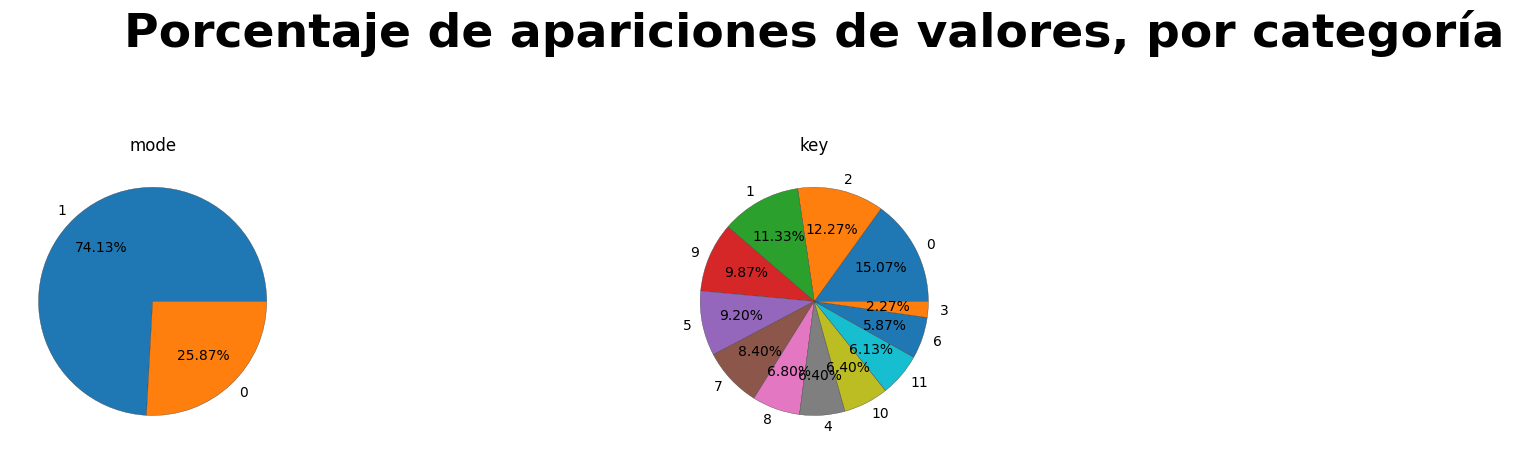

In [ ]:
variables_categoricas = ["mode", "key"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig.suptitle("Porcentaje de apariciones de valores, por categoría", y=1.05, fontsize=34, weight="bold")

for i, categoria in enumerate(variables_categoricas):
    cuenta = dataset[categoria].value_counts().to_frame()

    ax = axes[i//3, i%3]
    cuenta.plot.pie(
        title=categoria,
        y="count",
        ax=ax,
        autopct="%1.2f%%",
        pctdistance=0.65,
        wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
        legend=False,
        ylabel=''
    )

for j in range(len(variables_categoricas), 9):
    fig.delaxes(axes[j//3, j%3])

plt.tight_layout()
plt.show()

## Valores Atípicos

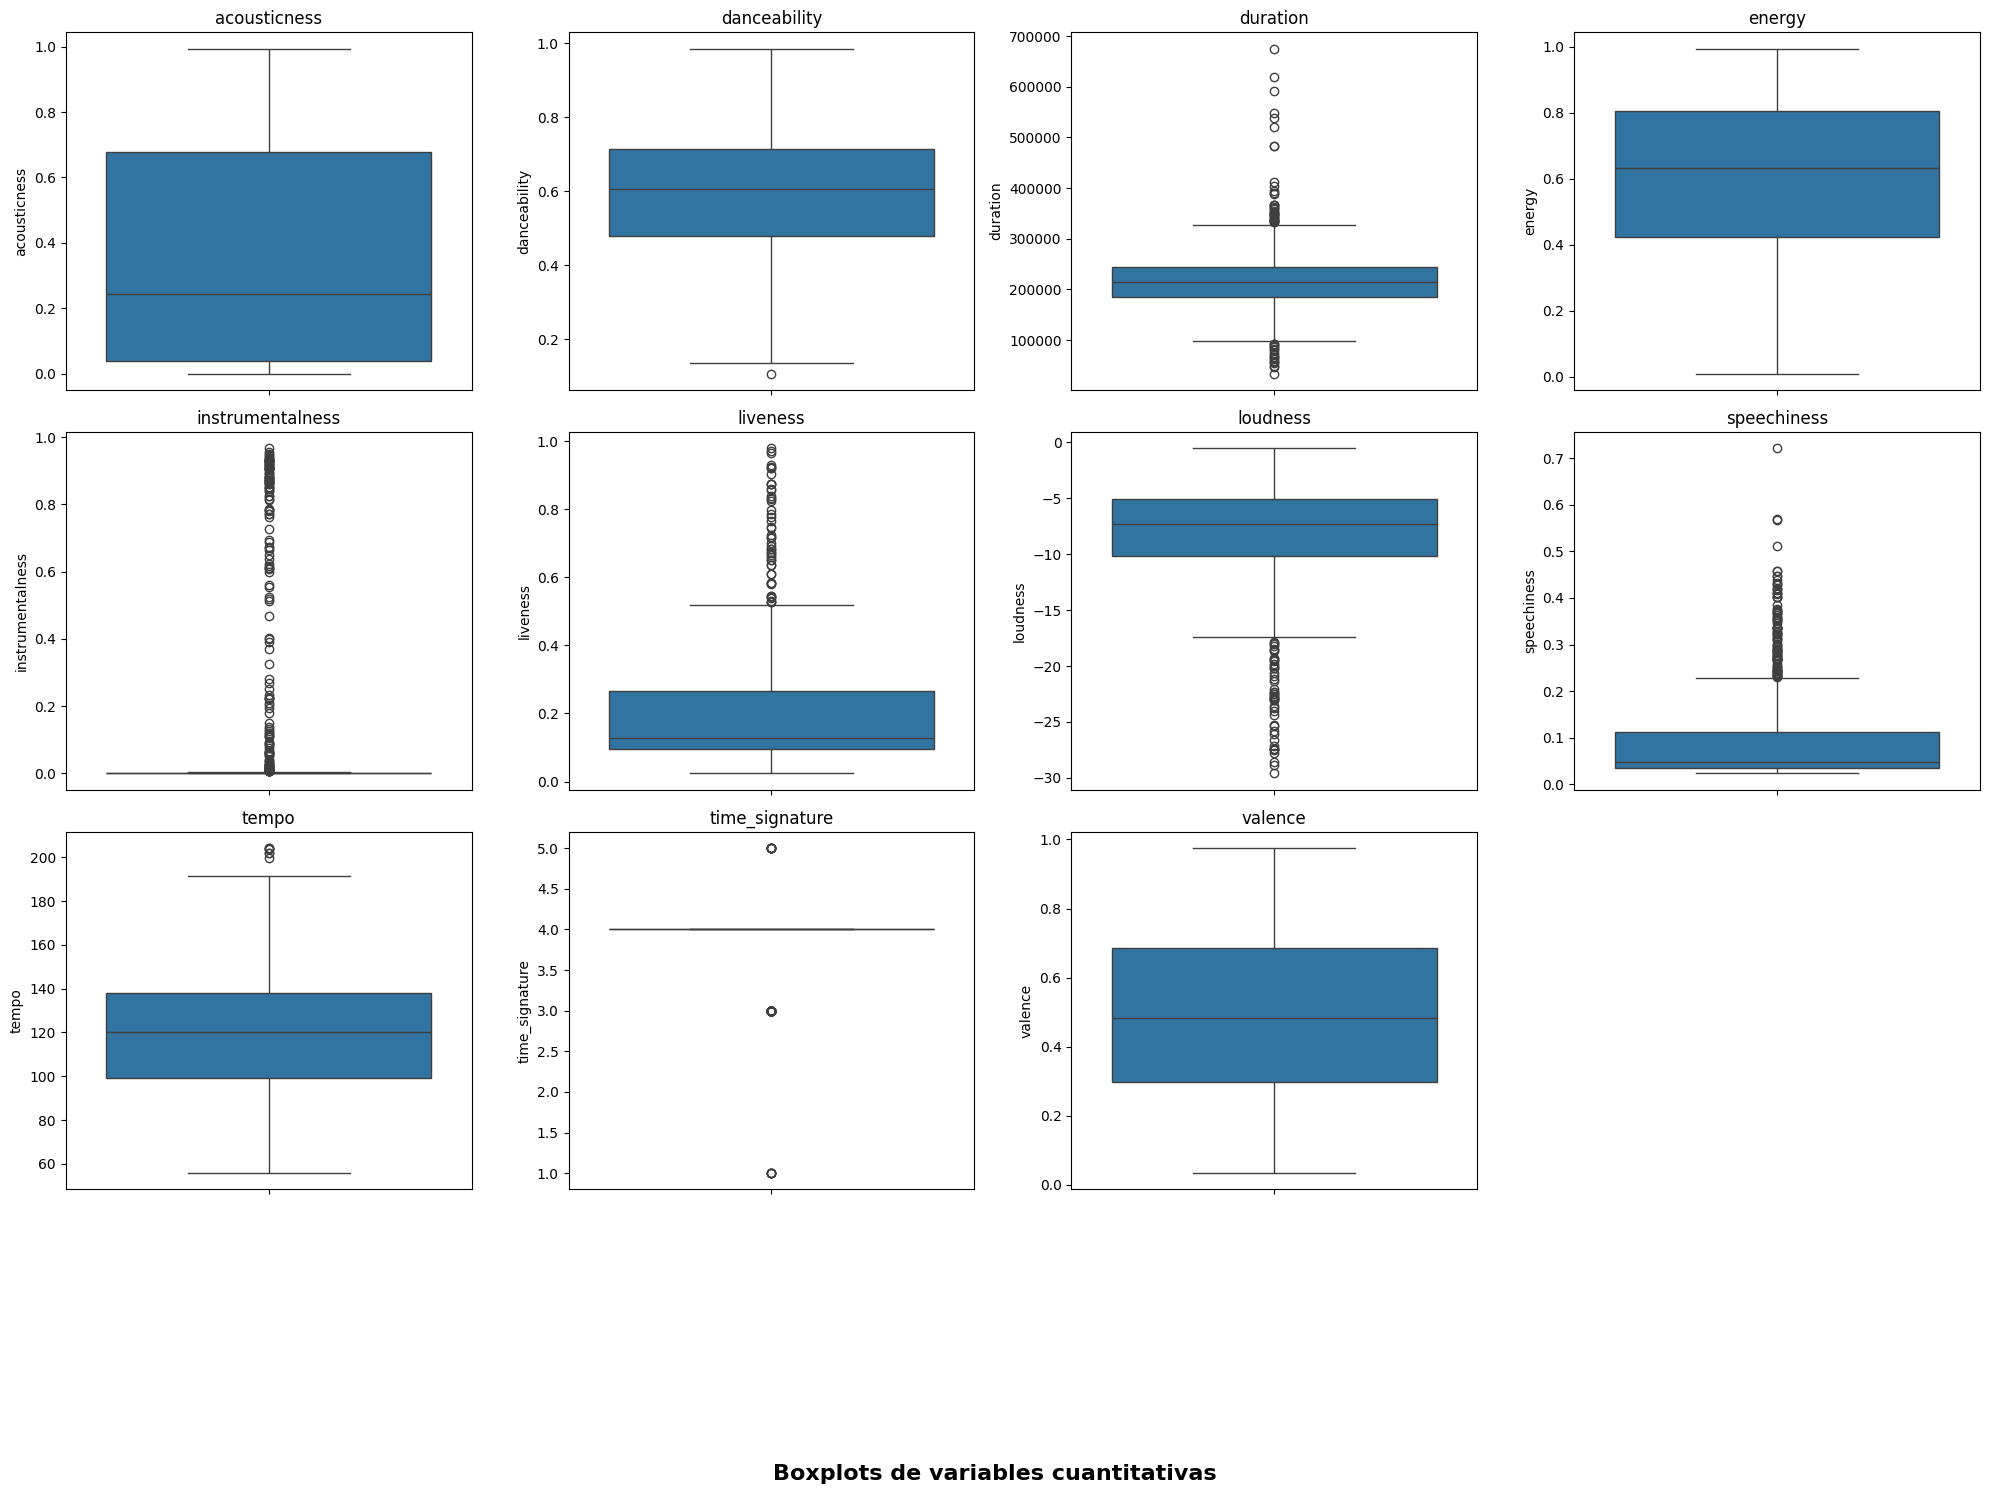

In [ ]:
n = len(dataset_cuantitativas)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(dataset_cuantitativas):
    sns.boxplot(data=dataset, y=col, ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Boxplots de variables cuantitativas", y=0.98, fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

De este gráfico podemos ver que hay potenciales outliers en `duration`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo` y `time_signature`, pero todos son valores que se encuentran dentro del rango de valores válidos salvo en `time_signature`, donde el rango válido es 3-7 y hay valores con valor 1.

In [ ]:
count = (dataset['time_signature'] == 1).sum()
print(f"numero de filas con time_signature igual a 1: {count}")

numero de filas con time_signature igual a 1: 6


Decidimos imputar el valor de `time_signature` en estas filas usando la media:

In [ ]:
promedio = round(dataset['time_signature'].mean())

dataset.loc[dataset['time_signature'] == 1, 'time_signature'] = promedio

print(f"Valores reemplazados con promedio: {promedio}")

Valores reemplazados con promedio: 4


## Correlaciones

Analisis gráfico de como estan correlacionadas cada variable numerica del dataset.

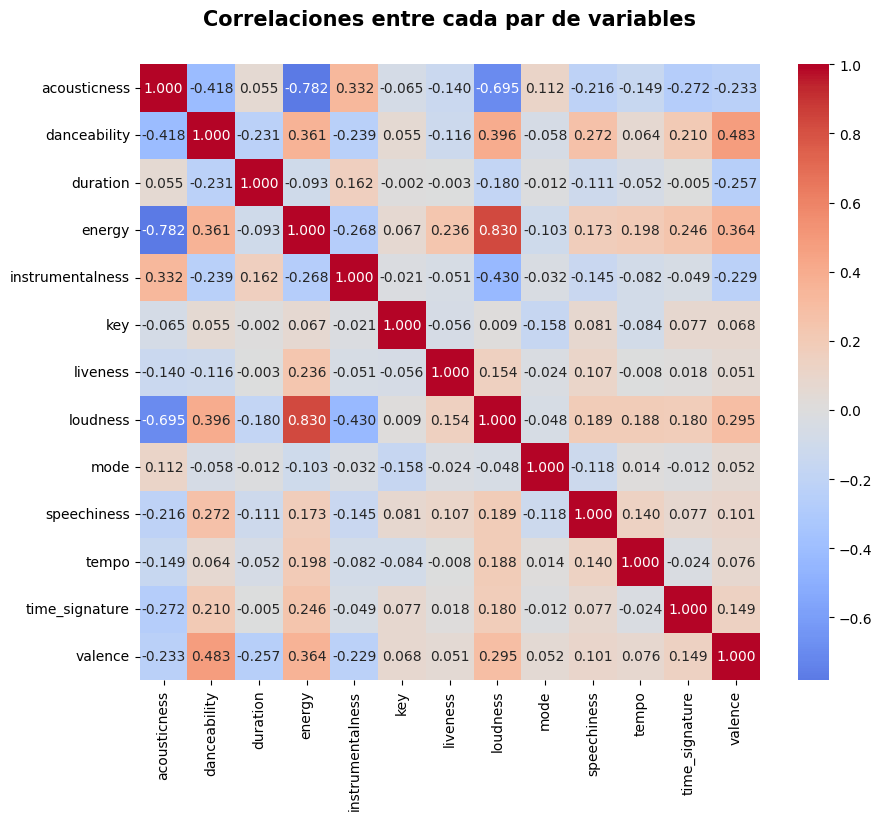

In [ ]:
# Calculamos la matriz de correlaciones
correlaciones = dataset.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlaciones,
    annot=correlaciones.round(3),
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    cbar=True
)

plt.title(
    "Correlaciones entre cada par de variables",
    y=1.05,
    fontdict={"size": 15, "weight": "bold"}
)
plt.show()


## Correlaciones notables:

**Negativas:**
* `energy` y `acousticness`:
aquellas canciones que contienen mayores sonidos acústicos son percibidas como menos enérgicas.
* `acousticness` y `loudness`:
aquellas canciones que contienen mayores sonidos acústicos suelen ser más tranquilas

**Positivas:**
* `energy` y `loudness`:
aquellas canciones con mayor volumen son percibidas como más enérgicas.

# Análisis de tendencia al clustering

In [ ]:
from sklearn.neighbors import NearestNeighbors
import random

def Hopkins(datos,*args):
    n = datos.shape[0]
    d = datos.shape[1]

    if not args:
        m = int(0.1 * n)
        print("Numero de puntos al azar por defecto",m)
    else:
        m = args[0]

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(datos)
    rand_ind = random.sample(range(0, n, 1), m)

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True)
        ui.append(u_dist[0][1])

        w_dist, _ = nbrs.kneighbors(datos[rand_ind[j]].reshape(1, -1), 2, return_distance=True)
        wi.append(w_dist[0][1])

    H = sum(ui) / (sum(ui) + sum(wi))
    return H

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset)
score = Hopkins(dataset_scaled)
print(f"valor de Hopkins: {score:.4f}")

Numero de puntos al azar por defecto 75
valor de Hopkins: 0.9138


Un valor de Hopkins cercano a 1 sugiere que los datos están estructurados y probablemente sean adecuados para la agrupación en clústeres.


## Estimación de cantidad de clusters

Para estimar la cantidad de clusters vamos a utilizar el **método del codo**, el cual consiste en  la suma de los errores cuadráticos dentro de cada cluster (Within-Cluster Sum of Squares, WCSS) para diferentes valores de 𝑘. En K-Means, el “error” se entiende como la distancia de cada punto a su centroide asignado. A medida que se incrementa el número de clusters, el WCSS disminuye, pero llega un punto donde la mejora deja de ser significativa. Ese punto de inflexión, que gráficamente se asemeja a un 'codo', indica el número de clusters más adecuado.

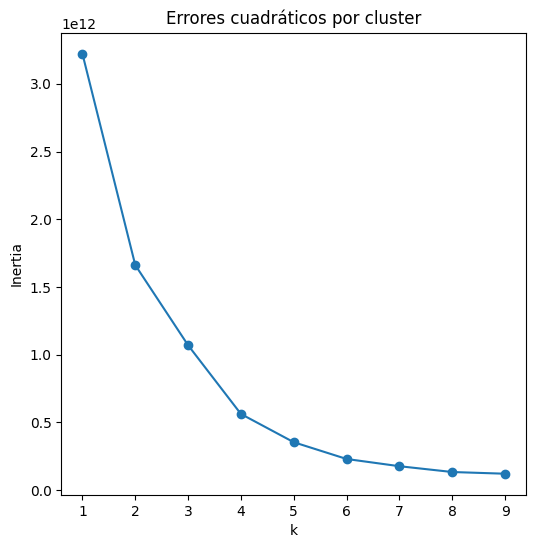

In [ ]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 10)

for k in K:
  km = KMeans(n_clusters=k)
  km.fit(dataset)
  inertias.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(K, inertias, '-o')
plt.title("Errores cuadráticos por cluster")
plt.xlabel(r'k')
plt.ylabel('Inertia')
plt.show()

De manera visual, podemos ver que el **método del codo** nos sugiere que utilicemos una cantidad de clusters aproximadamente igual a 4. Vamos a graficar ahora como se vería:

Cargando modelo ya entrenado



Text(0.5, 1.0, 'K-Means con k = 4 (Regla del Codo)')

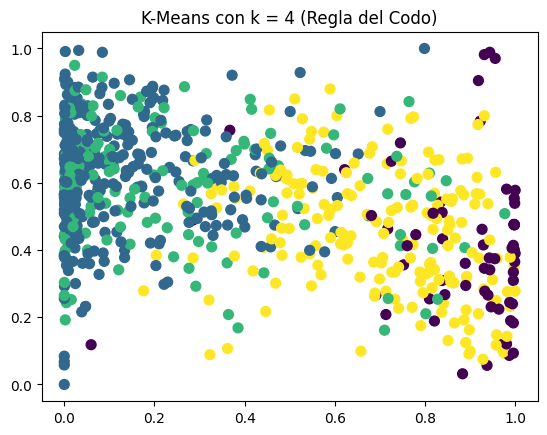

In [ ]:
# KMeans con K=4
modelo_k_cuatro_path = "modelo_k_cuatro.joblib"
modelo_k_cuatro_url = "https://drive.google.com/file/d/1vx4GEzHadEwCfqlCbGQzeYK8SeGaC6ar/view?usp=drive_link"

if not os.path.exists(modelo_k_cuatro_path):
  gdown.download(modelo_k_cuatro_url, modelo_k_cuatro_path, quiet = False, fuzzy = True)

if not os.path.exists(modelo_k_cuatro_path):
  print("Entrenando el modelo\n")
  kmeans1 = KMeans(n_clusters=4, random_state=42)
  kmeans1.fit(dataset_scaled)
  dump(kmeans1, "modelo_k_cuatro.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  kmeans1 = load("modelo_k_cuatro.joblib")

#predicciones
clusters1 = kmeans1.predict(dataset_scaled)

plt.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], c=clusters1, s=50, cmap='viridis')
plt.title("K-Means con k = 4 (Regla del Codo)")


Graficamente no parece haber una clara separación entre los 4 clusters, por lo que deberíamos usar otro criterio para poder decidir.



```
# Esto tiene formato de código
```

## Silhouette Score

El Índice de Silueta es una métrica que permite evaluar la calidad de un clustering al medir qué tan bien se separan los grupos entre sí.

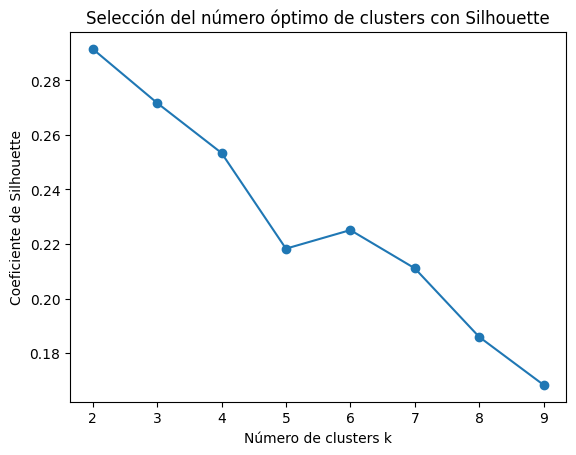

El número óptimo de clusters es: 2


In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(dataset_scaled)
    score = silhouette_score(dataset_scaled, labels)
    silhouette_scores.append(score)

optimal_k = k_range[np.argmax(silhouette_scores)]

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Número de clusters k")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Selección del número óptimo de clusters con Silhouette")
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1))
plt.show()

print(f"El número óptimo de clusters es: {optimal_k}")


El método de **Silhouette Score** nos sugiere que el número de clusters óptimo es 2, vamos a graficar ahora como se vería:

Entrenamos el modelo


Text(0.5, 1.0, 'K-Means con k = 2 (Shilhouette)')

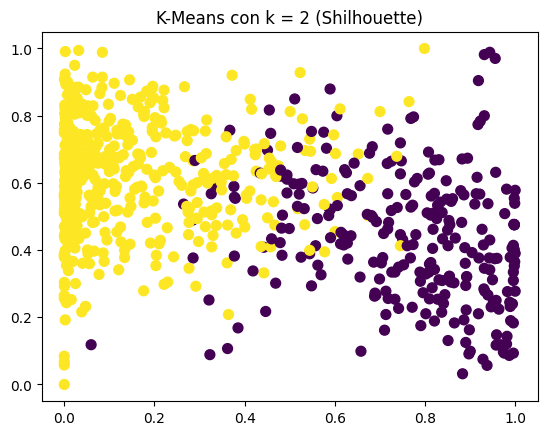

In [ ]:
# KMeans con K=2
modelo_k_dos_path = "modelo_k_dos.joblib"
modelo_k_dos_url = "https://drive.google.com/file/d/1xs9IUSzBg3IPwxZxMjJb0ooNCvNKbrST/view?usp=drive_link"

if not os.path.exists(modelo_k_dos_path):
  gdown.download(modelo_k_dos_url, modelo_k_dos_path, quiet = False, fuzzy = True)

if not os.path.exists(modelo_k_dos_path) or os.path.getsize(modelo_k_dos_path) == 0:
  print("Entrenamos el modelo")
  kmeans2 = KMeans(n_clusters=2, random_state=42)
  kmeans2.fit(dataset_scaled)
  dump(kmeans2, "modelo_k_dos.joblib")

else:
  print("Cargando modelo ya entrenado\n")
  kmeans2 = load("modelo_k_dos.joblib")

clusters2 = kmeans2.predict(dataset_scaled)

plt.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], c=clusters2, s=50, cmap='viridis')
plt.title("K-Means con k = 2 (Shilhouette)")

Podemos concluir que la cantidad de clusters 2 es el valor más óptimo ya que por un lado maximiza el **Silhouette Score** y por el otro podemos visualizar claramente una separación coherente entre clusters.

In [ ]:
# agregamos el cluster como nueva columna del dataset
dataset['cluster'] = clusters2

# Análisis de clusters formados

Para entender que caracteriza a cada cluster formado podemos analizar los valores promedio de las variables de las canciones que se encuentran en cada cluster:

In [ ]:
dataset_clusters = dataset.groupby("cluster").mean()
dataset_clusters


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
cluster,,,,,,,,,,,,,
0,0.747,0.493,226559.045,0.329,0.212,4.155,0.177,-12.888,0.849,0.065,115.254,3.811,0.387
1,0.144,0.653,216590.522,0.739,0.039,5.198,0.218,-6.117,0.682,0.118,123.220,3.990,0.558


Graficamos los valores para poder realizar un análisis más detallado:

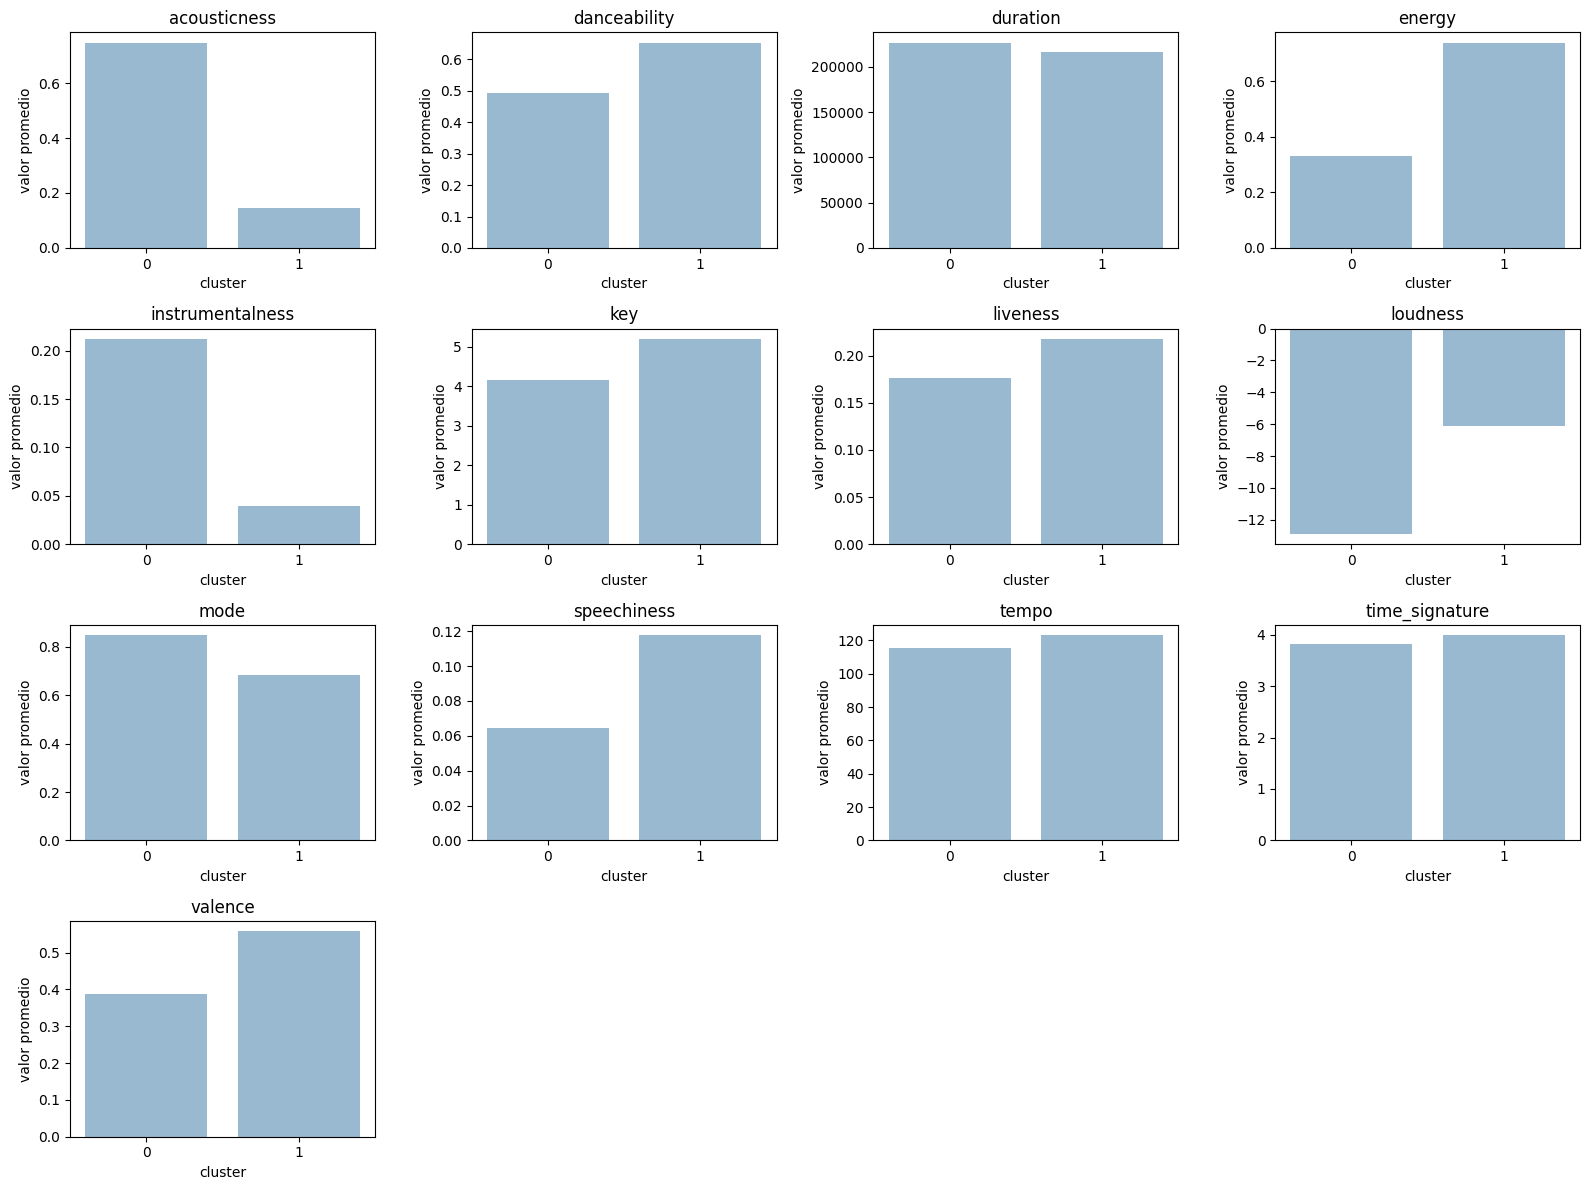

In [ ]:
variables = dataset_clusters.columns
n_columns = 4
n_rows = (len(variables) // n_columns) + 1

fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(n_columns * 4, n_rows * 3))
axes = axes.flatten()

for i, variable in enumerate(variables):
  eje_x = dataset_clusters.index
  eje_y = dataset_clusters[variable]
  sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, ax=axes[i], alpha=0.5).set(title=variable, ylabel='valor promedio',xlabel='cluster')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Viendo estos gráficos podemos concluir que:
- **Cluster 0**: podemos ver que las canciones que se encuentran en este cluster son principalmente canciones acústicas e instrumentales, percibidas como de menor energia (tiene sentido dado que existe una correlación negativa entre `energy` y `acousticness`) y de menor volumen (tambien tiene sentido dada la correlación negativa ya mencionada y la correlación positiva entre `loudness` y `energy`).

- **Cluster 1**: podemos ver que las canciones que se encuentran en este cluster son principalmente canciones poco acústicas e instrumentales pero que son percibidas como muy enérgicas y de mayor volumen. Tambien se puede decir que son canciones un poco más bailables y con más contenido hablado.